## Author: Ryan Inghilterra - DSE 210 - Worksheet 10

### Number 4 - PCA on animals set

In [1]:
import pandas as pd
from sklearn import decomposition
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


read in the data, there are 50 animals in the dataset and there are 85 different features

In [2]:
train_data = pd.read_table('Animals_with_Attributes/predicate-matrix-continuous.txt', delim_whitespace=True, header=None)
animal_names = pd.read_table('Animals_with_Attributes/classes.txt', delim_whitespace=True, header=None)
print(train_data.shape)
train_data['animal_name'] = animal_names[1]
train_data = train_data.set_index('animal_name')
train_data.head()

(50, 85)


,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
animal_name,,,,,,,,,,,,,,,,,,,,,
antelope,-1.00,-1.00,-1.0,-1.00,12.34,0.0,0.0,0.0,16.11,9.19,...,0.00,0.00,1.23,10.49,39.24,17.57,50.59,2.35,9.70,8.38
grizzly+bear,39.25,1.39,0.0,74.14,3.75,0.0,0.0,0.0,1.25,0.00,...,7.64,9.79,53.14,61.80,12.50,24.00,3.12,58.64,20.14,11.39
killer+whale,83.40,64.79,0.0,0.00,1.25,0.0,0.0,0.0,68.49,32.69,...,79.49,0.00,0.00,38.27,9.77,52.03,24.94,15.77,13.41,15.42
beaver,19.38,0.00,0.0,87.81,7.50,0.0,0.0,0.0,0.00,7.50,...,65.62,0.00,0.00,3.75,31.88,41.88,23.44,31.88,33.44,13.12
dalmatian,69.58,73.33,0.0,6.39,0.00,0.0,0.0,0.0,37.08,100.00,...,1.25,6.25,0.00,9.38,31.67,53.26,24.44,29.38,11.25,72.71


In [3]:
pca = decomposition.PCA(n_components=2)
pca.fit(train_data)
X = pca.transform(train_data)
df = pd.DataFrame(X, columns = ['PCA1', 'PCA2'])
df['animal'] = train_data.index.values
df.head()

,PCA1,PCA2,animal
0,14.332003,-106.359925,antelope
1,-58.963086,76.226820,grizzly+bear
2,170.087672,139.366237,killer+whale
3,31.855826,54.046382,beaver
4,-29.657535,11.391705,dalmatian


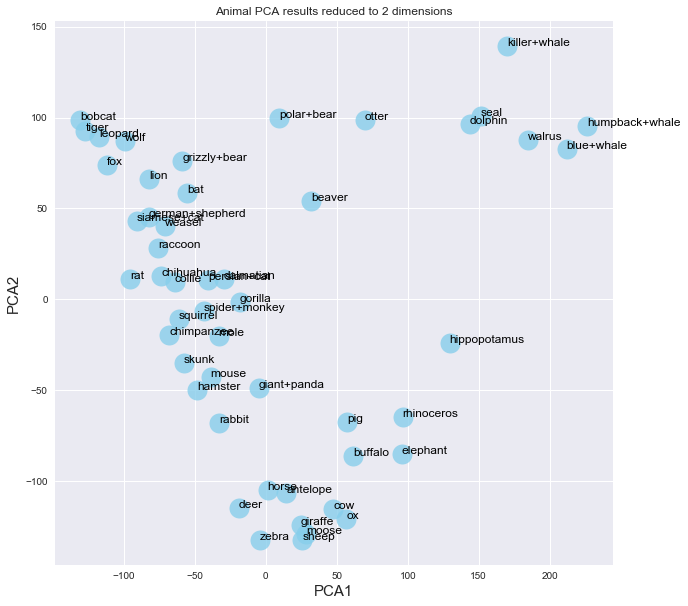

In [4]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Year', size=15)
ax.set_ylabel('Poverty %', size=15)
ax.set_title('Animal PCA results reduced to 2 dimensions')
p1=sns.regplot(data=df, x="PCA1", y="PCA2", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0,df.shape[0]):
    p1.text(df.PCA1[line], df.PCA2[line], df.animal[line], horizontalalignment='left', size='medium', color='black')

The embedding seems sensible! We see that animals that you would expect to similar are close to each other

## Number 5 - MNIST Image Reconstruction

In [5]:
from scipy import stats
pd.options.display.max_rows = 999

In [6]:
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [7]:
x,y = loadmnist('train-images-idx3-ubyte', 'train-labels-idx1-ubyte')

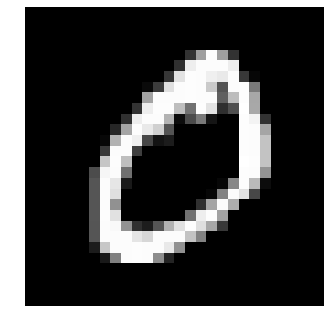

In [8]:
displaychar(x[1])

x is a 60,000 by 784 array where each row corresponds to an image and y to a length-60,000 array where each entry is a label (0-9)

## part (a)

first lets calculate the covariance matrix

In [9]:
cov_matrix = np.cov(x.T)
cov_matrix.shape

(784, 784)

now lets get the eigenvalues and eigenvectors of the covariance matrix

In [10]:
from numpy import linalg

eigenValues, eigenVectors = linalg.eig(cov_matrix)
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

Compute these fractions (of lost information) for the MNIST data set, for k = 200, 150, 100, 50, 25

In [11]:
def frac_info_lost(k):
    frac_numerator = eigenValues[k:].sum() #k+1 to d (d is 784)    784th element is at index 783 is 201st element is at index 200
    frac_denom = eigenValues.sum()
    frac = frac_numerator / frac_denom
    return frac

In [12]:
print("the residual variance (the information that gets lost).  Format is as a fraction out of 1")
for k in [200, 150, 100, 50, 25]:
    info_lost = frac_info_lost(k)
    print("k: {0}, fraction of info lost: {1}".format(k, info_lost.real))

the residual variance (the information that gets lost).  Format is as a fraction out of 1
k: 200, fraction of info lost: 0.0335526522989
k: 150, fraction of info lost: 0.0516435811854
k: 100, fraction of info lost: 0.0853714275605
k: 50, fraction of info lost: 0.175353136667
k: 25, fraction of info lost: 0.3081950912


## part (b)

combine labels with data

In [13]:
df = pd.DataFrame(x)
df['label'] = y
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


split the data by digits

In [14]:
digit_df_dic = {}
for i in range(0,10):
    digit_data = df[df['label'] == i]
    digit_df_dic[i] = digit_data

In [15]:
digit_df_dic[2].head(2)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [16]:
def pca_and_info_lost(k):
    digit_info_lost_dic = {}
    pca_dic = {}
    for i in range(0,10):
        digit_df = digit_df_dic[i]
        data = digit_df.iloc[:,:-1] # want to remove label info
        pca = decomposition.PCA(n_components=k)
        pca.fit(data)
        X = pca.transform(data)
        pca_dic[i] = pca
        #You get the F from the explained variance ratio .It will be 1-sum(evr)
        evr = pca.explained_variance_ratio_
        frac_info_lost = 1 - sum(evr)
        digit_info_lost_dic[i] = frac_info_lost
    return digit_info_lost_dic, pca_dic

In [17]:
k = 200
info_lost_dic_200, pca_dic_200 = pca_and_info_lost(k)
print("the residual variance (the information that gets lost) for k = 200. Format is as a fraction out of 1")
print(info_lost_dic_200)

the residual variance (the information that gets lost) for k = 200. Format is as a fraction out of 1
{0: 0.02119886638451951, 1: 0.0067698495954289228, 2: 0.028649735244014707, 3: 0.026469588305306879, 4: 0.025854198266347717, 5: 0.024106638172181505, 6: 0.019392353622529224, 7: 0.021690161243388628, 8: 0.025465603939267334, 9: 0.01733986290237477}


In [18]:
k = 150
info_lost_dic_150, pca_dic_150 = pca_and_info_lost(k)
print("the residual variance (the information that gets lost) for k = 150. Format is as a fraction out of 1")
print(info_lost_dic_150)

the residual variance (the information that gets lost) for k = 150. Format is as a fraction out of 1
{0: 0.034744971034477712, 1: 0.014975493919667904, 2: 0.046361557240235829, 3: 0.043960556404030293, 4: 0.043006345418512781, 5: 0.040315264127329109, 6: 0.033010870519567859, 7: 0.036599334476510981, 8: 0.043540940856320876, 9: 0.031270856433676664}


In [19]:
k = 100
info_lost_dic_100, pca_dic_100 = pca_and_info_lost(k)
print("the residual variance (the information that gets lost) for k = 100. Format is as a fraction out of 1")
print(info_lost_dic_100)

the residual variance (the information that gets lost) for k = 100. Format is as a fraction out of 1
{0: 0.059777350831676679, 1: 0.031169892638513885, 2: 0.078915757576094481, 3: 0.076514750560563671, 4: 0.07414285395377973, 5: 0.071272783584920174, 6: 0.058259457968048989, 7: 0.063977122544910947, 8: 0.077500243679056058, 9: 0.057945984976799703}


In [20]:
k = 50
info_lost_dic_50, pca_dic_50 = pca_and_info_lost(k)
print("the residual variance (the information that gets lost) for k = 50. Format is as a fraction out of 1")
print(info_lost_dic_50)

the residual variance (the information that gets lost) for k = 50. Format is as a fraction out of 1
{0: 0.11961185429029086, 1: 0.073031286010247776, 2: 0.16193324755090888, 3: 0.15909210736860202, 4: 0.14803962450197239, 5: 0.14978901295041902, 6: 0.12238076295384281, 7: 0.12896311678226424, 8: 0.16795205038400629, 9: 0.1235535088540789}


In [21]:
k = 25
info_lost_dic_25, pca_dic_25 = pca_and_info_lost(k)
print("the residual variance (the information that gets lost) for k = 25. Format is as a fraction out of 1")
print(info_lost_dic_25)

the residual variance (the information that gets lost) for k = 25. Format is as a fraction out of 1
{0: 0.20751531099715803, 1: 0.13132042509390129, 2: 0.28434002406515146, 3: 0.27578824176415717, 4: 0.25322818669352953, 5: 0.26352404202502977, 6: 0.22298780472511792, 7: 0.2222914842001098, 8: 0.30004738654761454, 9: 0.22542737790369605}


get random image for each digit

In [22]:
random_image_dic = {}
for i in range(0,10):
    digit_df = digit_df_dic[i]
    rand_image = digit_df.sample().iloc[:,:-1] # get a random image and remove label
    random_image_dic[i] = rand_image

In [23]:
def display_orig_recon_images(image, image2):
    fig = plt.figure()
    plt.subplot(221)
    plt.axis('off')
    plt.title("original image")
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.subplot(222)
    plt.title("reconstructed image")
    plt.imshow(np.reshape(image2, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

For K = 200


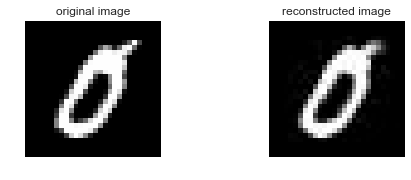

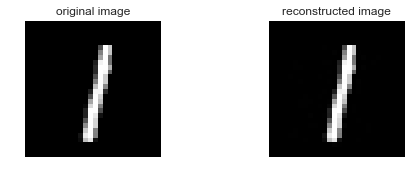

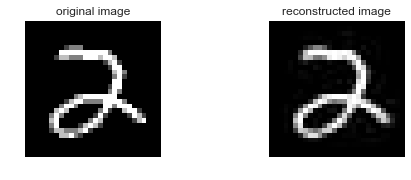

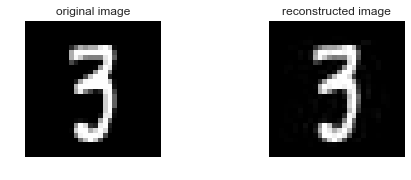

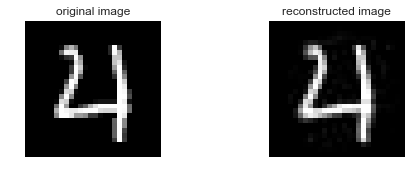

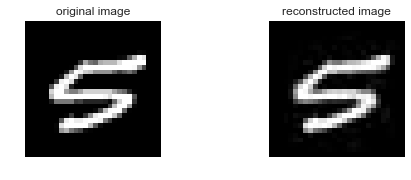

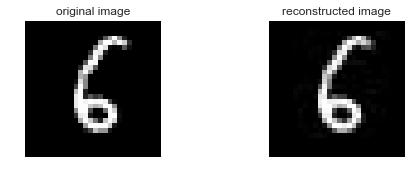

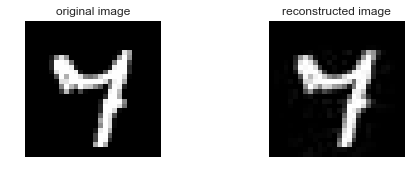

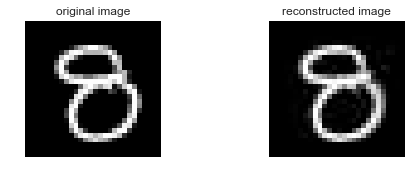

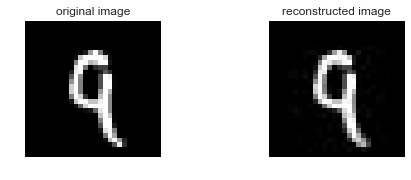

In [24]:
#for K = 200
k = 200
print("For K = 200")
for i in range(0,10):
    rand_image = random_image_dic[i]
    pca = pca_dic_200[i] # get the pca classifier for the specific k and digt
    proj_data = pca.transform(rand_image)
    recon_data = pca.inverse_transform(proj_data)
    recon_image = recon_data[0]
    recon_image[recon_image < 0] = 0
    recon_image[recon_image > 255] = 255
    display_orig_recon_images(rand_image.values, recon_image)   

For K = 150


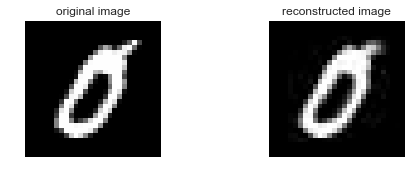

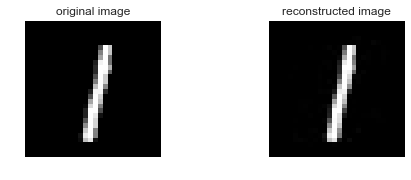

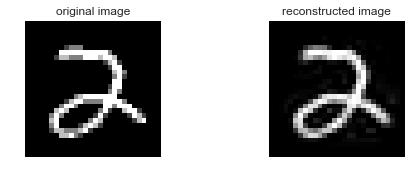

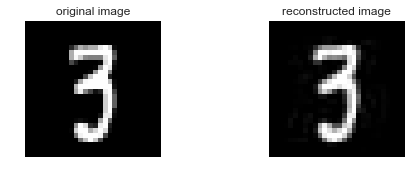

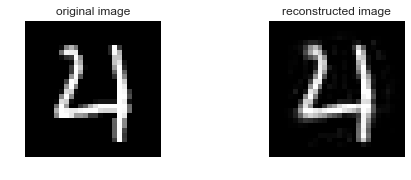

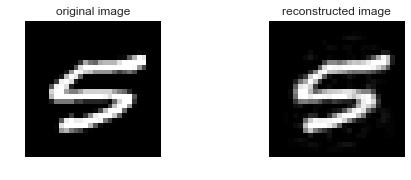

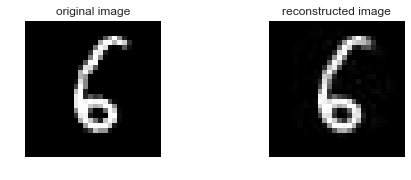

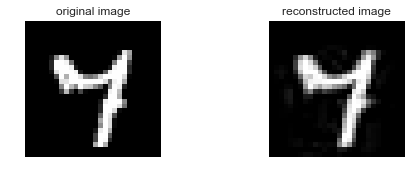

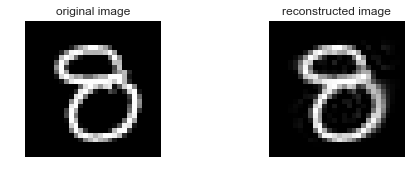

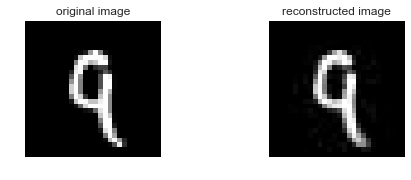

In [25]:
#for K = 150
k = 150
print("For K = 150")
for i in range(0,10):
    rand_image = random_image_dic[i]
    pca = pca_dic_150[i] # get the pca classifier for the specific k and digt
    proj_data = pca.transform(rand_image)
    recon_data = pca.inverse_transform(proj_data)
    recon_image = recon_data[0]
    recon_image[recon_image < 0] = 0
    recon_image[recon_image > 255] = 255
    display_orig_recon_images(rand_image.values, recon_image)    

For K = 100


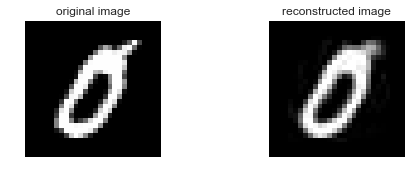

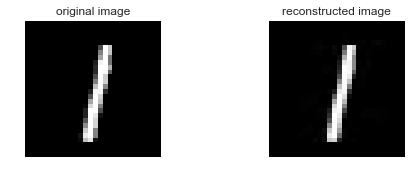

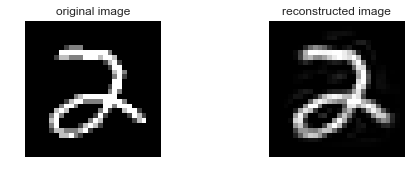

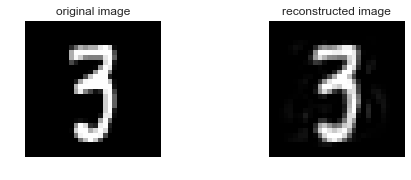

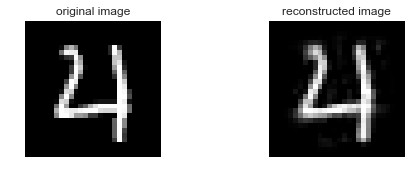

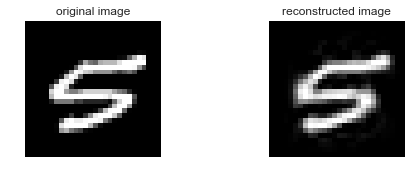

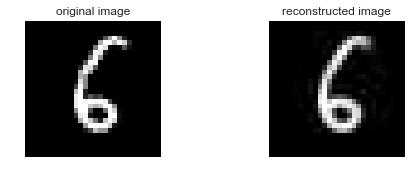

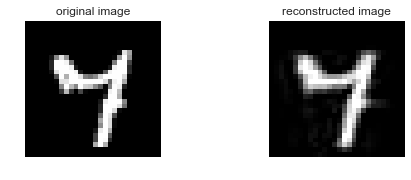

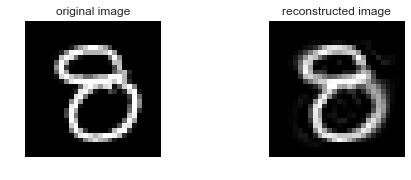

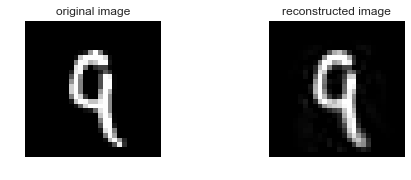

In [26]:
#for K = 100
k = 100
print("For K = 100")
for i in range(0,10):
    rand_image = random_image_dic[i]
    pca = pca_dic_100[i] # get the pca classifier for the specific k and digt
    proj_data = pca.transform(rand_image)
    recon_data = pca.inverse_transform(proj_data)
    recon_image = recon_data[0]
    recon_image[recon_image < 0] = 0
    recon_image[recon_image > 255] = 255
    display_orig_recon_images(rand_image.values, recon_image)   

For K = 50


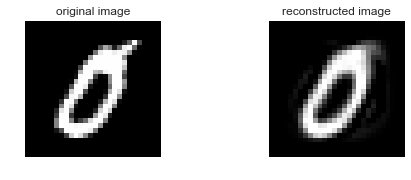

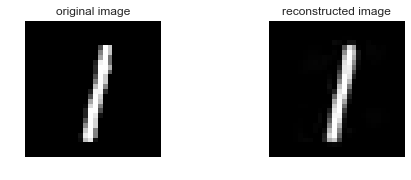

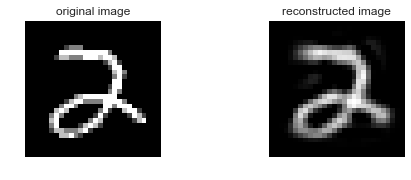

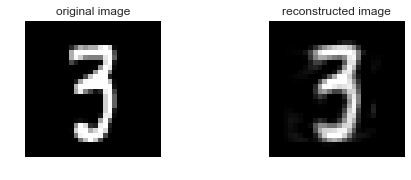

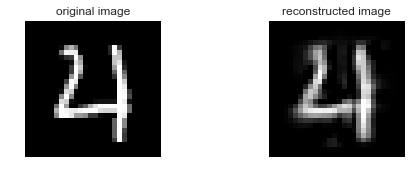

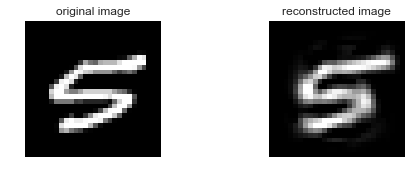

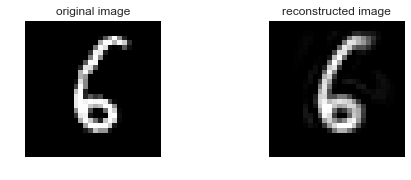

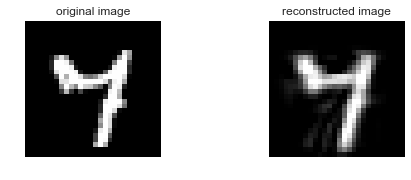

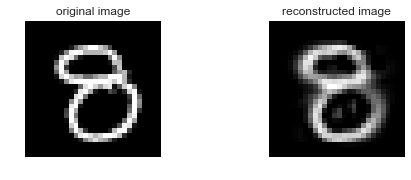

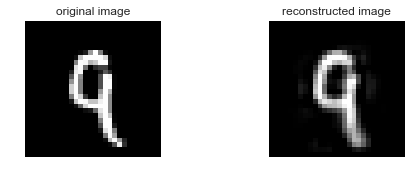

In [27]:
#for K = 50
k = 50
print("For K = 50")
for i in range(0,10):
    rand_image = random_image_dic[i]
    pca = pca_dic_50[i] # get the pca classifier for the specific k and digt
    proj_data = pca.transform(rand_image)
    recon_data = pca.inverse_transform(proj_data)
    recon_image = recon_data[0]
    recon_image[recon_image < 0] = 0
    recon_image[recon_image > 255] = 255
    display_orig_recon_images(rand_image.values, recon_image) 

For K = 25


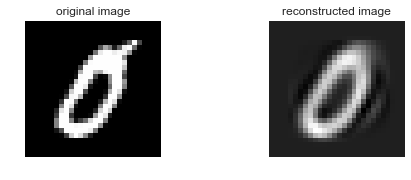

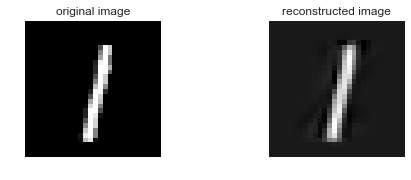

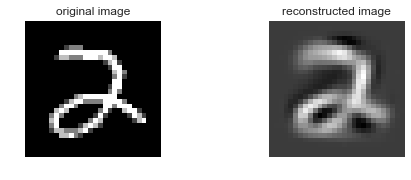

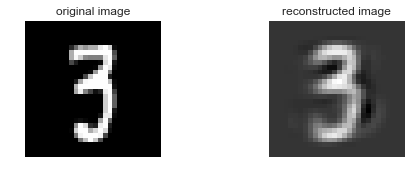

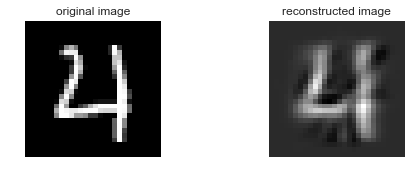

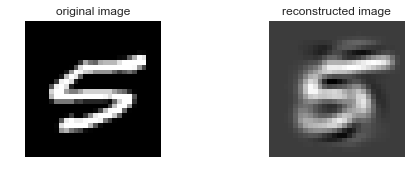

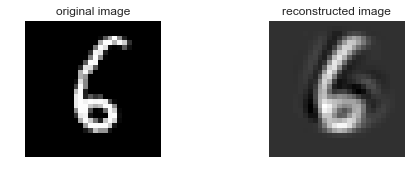

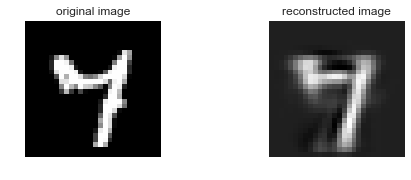

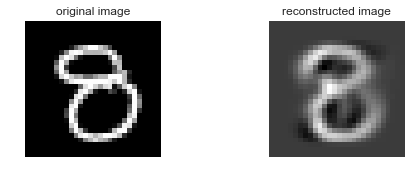

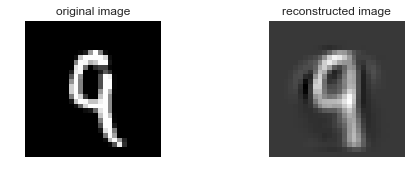

In [28]:
#for K = 25
k = 25
print("For K = 25")
for i in range(0,10):
    rand_image = random_image_dic[i]
    pca = pca_dic_25[i] # get the pca classifier for the specific k and digt
    proj_data = pca.transform(rand_image)
    recon_data = pca.inverse_transform(proj_data)
    recon_image[recon_image < 0] = 0
    recon_image[recon_image > 255] = 255
    recon_image = recon_data[0]
    display_orig_recon_images(rand_image.values, recon_image)    

Show all the fractions Fj (k) in a table. Which digit seems to be the most amenable to low dimension

In [29]:
F_j_k_df = pd.DataFrame([info_lost_dic_200, info_lost_dic_150, info_lost_dic_100, info_lost_dic_50, info_lost_dic_25])
F_j_k_df['k_val'] = [200, 150, 100, 50, 25]
F_j_k_df.set_index('k_val', inplace=True)
F_j_k_df.columns = ["digit_" + str(x) for x in F_j_k_df.columns]
F_j_k_df

,digit_0,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7,digit_8,digit_9
k_val,,,,,,,,,,
200,0.021199,0.006770,0.028650,0.026470,0.025854,0.024107,0.019392,0.021690,0.025466,0.017340
150,0.034745,0.014975,0.046362,0.043961,0.043006,0.040315,0.033011,0.036599,0.043541,0.031271
100,0.059777,0.031170,0.078916,0.076515,0.074143,0.071273,0.058259,0.063977,0.077500,0.057946
50,0.119612,0.073031,0.161933,0.159092,0.148040,0.149789,0.122381,0.128963,0.167952,0.123554
25,0.207515,0.131320,0.284340,0.275788,0.253228,0.263524,0.222988,0.222291,0.300047,0.225427


from the results we can see that digit 8 is most amenable (suspectible) of losing information when we reduce to lower dimensions. For example when we reduce to 25 dimensions (k=25) digit 8 has around 30 % of its information lost

on the other hand, digit 1 does not lose much information when we reduce to lower dimensions compared to the other digits. For example when we reduce to 25 dimensions (k=25), digit 1 has around 13 % lost information